# Семинар 4. Градиентный спуск

Рассмотрим линейную модель с двумя параметрами 

$$ \bar{y} = w_0 + w_1 x $$

и функцией потерь MSE (Mean Squared Error)

$$ \text{MSE} = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \bar{y}_i)^2 .$$

Напомним, что градиент — это вектор частных производных

$$
\nabla f(\mathbf{x})
= \begin{pmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{pmatrix},
$$

где $ \mathbf{x} = (x_1, x_2, \dots, x_n) \in \mathbb{R}^n $ — вектор переменных, а $ f: \mathbb{R}^n \to \mathbb{R} $ — дифференцируемая функция.

Нас интересует градиент функции потерь как функции от параметров модели $ w_0 $ и $ w_1 $ 

$$
\nabla_{\mathbf{w}} L
= \nabla_{\mathbf{w}} \frac{1}{n} \sum_{i = 1}^{n} (y_i - \bar{y}_i)^2
= \frac{1}{n} \sum_{i = 1}^{n} \nabla_{\mathbf{w}} (y_i - \bar{y}_i)^2.
$$

Рассмотри градиент для одного объекта

$$
\begin{align*}
\nabla_{\mathbf{w}} L_i &= \nabla_{\mathbf{w}} (y_i - \bar{y}_i)^2 \\
&= \nabla_{\mathbf{w}} (y_i - (w_0 + w_1 x_i))^2 \\
&= \nabla_{\mathbf{w}} (y_i^2 - 2 y_i w_0 - 2 y_i w_1 x_i + w_0^2 + 2 w_0 w_1 x_i + w_1^2 x_i^2)
\end{align*}
$$

и найдем частные производные

$$
\begin{align*}
\frac{\partial L_i}{\partial w_0} &= -2 (y_i - w_0 - w_1 x_i)
&
\frac{\partial L_i}{\partial w_1} &= -2 x_i (y_i - w_0 - w_1 x_i) \\
&= -2 (y_i - (w_0 + w_1 x_i))
&
&= -2 x_i (y_i - (w_0 + w_1 x_i)) \\
&= -2 (y_i - \bar{y}_i)
&
&= -2 x_i (y_i - \bar{y}_i).
\end{align*}
$$

Таким образом, градиент для одного объекта имеет вид

$$
\nabla_{\mathbf{w}} L_i
= \begin{pmatrix}
\frac{\partial L_i}{\partial w_0} \\
\frac{\partial L_i}{\partial w_1}
\end{pmatrix}
= -2 \begin{pmatrix}
y_i - \bar{y}_i \\
x_i (y_i - \bar{y}_i)
\end{pmatrix},
$$

а градиент для всех данных равен

$$
\nabla_{\mathbf{w}} L
= -\frac{2}{n} \sum_{i = 1}^{n}
\begin{pmatrix}
y_i - \bar{y}_i \\
x_i (y_i - \bar{y}_i)
\end{pmatrix}.
$$

In [10]:
from typing import Optional

import numpy as np
import matplotlib.pyplot as plt

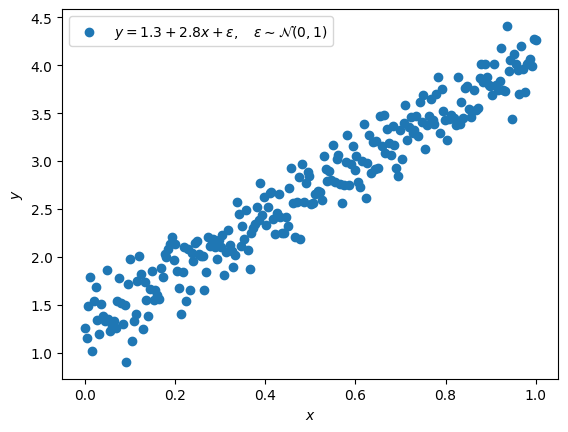

In [11]:
n = 250

x = np.linspace(0, 1, n)
y = 1.3 + 2.8 * x + np.random.normal(scale=0.2, size=n)

plt.scatter(x=x, y=y, label=r"$ y = 1.3 + 2.8 x + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 1) $")

plt.xlabel("$ x $")
plt.ylabel("$ y $")

plt.legend()

plt.show()

In [12]:
def plot_loss_function(
    x: np.ndarray,
    y: np.ndarray,
    w0_range: tuple[float, float] = (-1.0, 1.0),
    w1_range: tuple[float, float] = (-1.0, 1.0),
) -> None:
    W0, W1 = np.meshgrid(np.linspace(*w0_range, 100), np.linspace(*w1_range, 100))
    L = np.square(y - (W0[..., None] + W1[..., None] * x)).mean(axis=-1)
    plt.contour(W0, W1, L, levels=20)

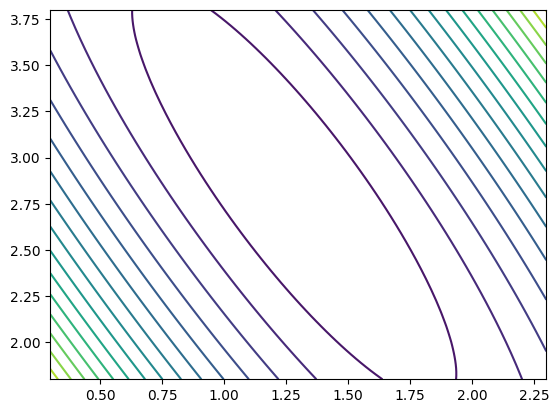

In [13]:
plot_loss_function(x, y, w0_range=(0.3, 2.3), w1_range=(1.8, 3.8))

In [14]:
def gradient(
    x: float | np.ndarray,
    y: float | np.ndarray,
    w0: float,
    w1: float,
) -> tuple[float | np.ndarray, float | np.ndarray]:
    y_ = w0 + w1 * x
    error = y - y_
    return -2 * error, -2 * x * error
        

def gradient_descent(
    x: np.ndarray,
    y: np.ndarray,
    w0_: Optional[float] = None,
    w1_: Optional[float] = None,
    eta: float = 0.1,  # learning rate
    stochastic: bool = False,
    num_iters: int = 1_000,
) -> tuple[float, float]:
    w0, w1 = w0_, w1_

    if w0 is None:
        w0 = np.random.normal()
    
    if w1 is None:
        w1 = np.random.normal()

    trajectory = [(w0, w1)]

    for _ in range(num_iters):
        if stochastic:
            i = np.random.randint(0, x.size)
            dw0, dw1 = gradient(x[i], y[i], w0, w1)
        else:
            dw0, dw1 = map(np.mean, gradient(x, y, w0, w1))
        
        # update weights
        w0 = w0 - eta * dw0
        w1 = w1 - eta * dw1

        trajectory.append((w0, w1))
        

    return w0, w1, trajectory

In [15]:
w0, w1, trajectory = gradient_descent(x, y, w0_=0.0, w1_=0.0)
print(f"{w0 = :.3f}")
print(f"{w1 = :.3f}")

w0 = 1.283
w1 = 2.808


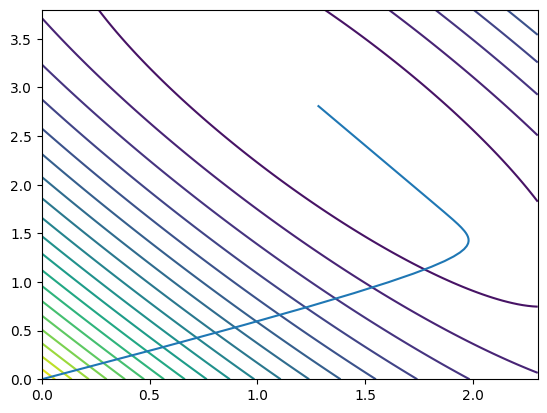

In [16]:
trajectory = np.array(trajectory)

plot_loss_function(x, y, w0_range=(0.0, 2.3), w1_range=(0.0, 3.8))
plt.plot(trajectory[:, 0], trajectory[:, 1])

In [17]:
w0, w1, trajectory = gradient_descent(x, y, w0_=0.0, w1_=0.0, stochastic=True)
print(f"{w0 = :.3f}")
print(f"{w1 = :.3f}")

w0 = 1.173
w1 = 2.928


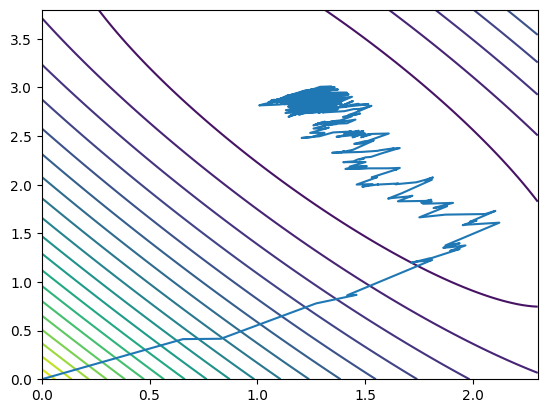

In [18]:
trajectory = np.array(trajectory)

plot_loss_function(x, y, w0_range=(0.0, 2.3), w1_range=(0.0, 3.8))
plt.plot(trajectory[:, 0], trajectory[:, 1])